# Analysis of World Countries

# Content
- <a href='#1'>1. Introduction</a> 
- <a href='#2'>2. Data description and objectives</a> 
- <a href='#3'>3. Data manipulation and validation</a>
    - <a href='#3-1'>3.1 Data manipulation: cleaning and shaping</a>
    - <a href='#3-2'>3.2 Data validation: identify columns with missed values</a>
- <a href='#4'>4. Data analysis visualisation</a>
    - <a href='#4-1'>4.1 Countries With Low Birthrate & Low GDP</a>
- <a href='#5'>5. Scraping and analysis of countries suicide rate</a>



# <a id='1'>1. Introduction</a>


In this project, I am investigating the dataset containing information on region, population, area, birthrate, deathrate, net migration and more of 227 countries. I will be focusing on the factors that affecting a country's GDP per capita and try to make a model using the data of 227 countries from the dataset. I will also briefly discuss the total GDPs. 

Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period. GDP per capita does not, however, reflect differences in the cost of living and the inflation rates of the countries; therefore, using a basis of GDP per capita at purchasing power parity is arguably more useful when comparing living standards between nations, while nominal GDP is more useful comparing national economies on the international market.

GDP can be determined in three ways, all of which should, theoretically, give the same result. They are the production (or output or value added) approach, the income approach, or the speculated expenditure approach.

The most direct of the three is the production approach, which sums the outputs of every class of enterprise to arrive at the total. The expenditure approach works on the principle that all of the product must be bought by somebody, therefore the value of the total product must be equal to people's total expenditures in buying things. The income approach works on the principle that the incomes of the producers must be equal to the value of their product, and determines GDP by finding the sum of all producers' incomes.

References: https://en.wikipedia.org/wiki/Gross_domestic_product

# <a id='2'>2. Data description and objectives </a>

I am investigating the dataset "Countries of the World"  from kaggle: https://www.kaggle.com/fernandol/countries-of-the-world.
This dataset has each country as a data point (227 countries in total), and for each, we have 20 columns, each column represents a different aspect or measure of the specific country. 
Below is data that we will be used for our analysis:
+ Country - name of countries
+ Region - geographic regions of the world
+ Population - the total number of humans currently living                           
+ Area (sq. mi.) - territories of eech country, in square miles                    
+ Pop. Density (per sq. mi.) -  the number of people per square mile          
+ Coastline (coast/area ratio) - the area where land meets the sea, a coastline of zero indicates that the country is landlocked.         
+ Net migration - difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year.                       
+ Infant mortality (per 1000 births) - this death toll shows the number of deaths of children under one year of age per 1000 live births. 
+ GDP ($ per capita)- is a metric that breaks down a country's economic output per person and is calculated by dividing the GDP of a country by its population.                  
+ Literacy (%) - percentage of population aged 15 years and over who can both read and write                       
+ Phones (per 1000) - the total number of mobile cellular telephones in use per 1000 people                 
+ Arable (%)- percent of land capable of being ploughed and used to grow crops                         
+ Crops (%) - percentage of plant  that can be grown and harvested extensively for profit or subsistence            + Other (%) - percentage of other areas that generate income for the country                           
+ Climate - climatic zone to which the country belongs                             
+ Birthrate - shows the average annual number of births during a year per 1,000 persons in the population          + Deathrate - shows the average annual number of deaths during a year per 1,000 persons in the population          + Agriculture - the percentage of the agriculture sector in the economic activity of each country.                
+ Industry -  the percentage of the industry sector in the economic activity of each country.                    
+ Service -  the percentage of the service sector in the economic activity of each country.       

The goal of the project is to understand this dataset, get some insights from it. 
Also, the analysis includes the following research:
1. Countries With Low Birthrate & Low GDP
2. Regional analysis of GDP per capita, net migration, and population
3. Regional ranking analysis according to the average GDP per capita
4. Relationship between GDP per capita and various factors
5. Total GDP, and factors affecting on total GDP
6. Make a model that can predict GDP per capita for each country

# <a id='3'>3. Data manipulation and validation</a>

### <a id='3-1'>3.1 Data manipulation: cleaning and shaping</a>

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Data Import

In [138]:
df = pd.read_csv('world_countries.csv')

##### Show data header

In [254]:
df.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418


##### Data information

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Here we see an issue. Except for 'Country' and 'Region', all other columns are numerical, yet only 'Population', 'Area', and 'GDP' are int/float type. While the rest (15/20) are identified as object type. <br> We need to convert those into float type, to avoid an error or some unexpected results. Because an object is a string in pandas so it performs a string operation instead of a mathematical one.  <br>
Also, column names are very long, We have to fix them as well. 

##### Fix column names

Many columns in the dataset have long names, we will change them to be shorter and better describtive.

In [141]:
df.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality",
                 "gdp_per_capita", "literacy","phones","arable","crops","other","climate","birthrate",
                 "deathrate","agriculture","industry", "service"])

##### Fix data types

Many columns in that dataset have _object_ as type. We will fix this by assigning float/string types to them. 

In [142]:
df.country = data.country.astype('category')

df.region = data.region.astype('category')

df.density = data.density.astype(str)
df.density = data.density.str.replace(",",".").astype(float)

df.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

df.net_migration = data.net_migration.astype(str)
df.net_migration = data.net_migration.str.replace(",",".").astype(float)

df.infant_mortality = data.infant_mortality.astype(str)
df.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

df.literacy = data.literacy.astype(str)
df.literacy = data.literacy.str.replace(",",".").astype(float)

df.phones = data.phones.astype(str)
df.phones = data.phones.str.replace(",",".").astype(float)

df.arable = data.arable.astype(str)
df.arable = data.arable.str.replace(",",".").astype(float)

df.crops = data.crops.astype(str)
df.crops = data.crops.str.replace(",",".").astype(float)

df.other = data.other.astype(str)
df.other = data.other.str.replace(",",".").astype(float)

df.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

df.birthrate = data.birthrate.astype(str)
df.birthrate = data.birthrate.str.replace(",",".").astype(float)

df.deathrate = data.deathrate.astype(str)
df.deathrate = data.deathrate.str.replace(",",".").astype(float)

df.agriculture = data.agriculture.astype(str)
df.agriculture = data.agriculture.str.replace(",",".").astype(float)

df.industry = data.industry.astype(str)
df.industry = data.industry.str.replace(",",".").astype(float)

df.service = data.service.astype(str)
df.service = data.service.str.replace(",",".").astype(float)

Now, let's check our new data types and column names:

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    object  
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               227 non-null    object  
 15  birthr

Now that looks good.

##### Show statistical analysis of our data set

Let's show min, max, mean, std, and count of each column in the dataset. 

In [144]:
df.describe()

,population,area,density,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


##### Invistigating undefined features

We need to understand what different values in the Climate, agriculture, industry, and service columns refer to.

In [149]:
df.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1,0.101,0.600,0.298
3,American Samoa,OCEANIA,2,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3,NaN,NaN,NaN


It is clear here that the values in (agriculture, industry, and service) columns are the percentages those different sectors in the economic activity in each country.
For example: agriculture is generating 38% of Afganistan's GDP, industry generates 24%, while service generates 38%; the total is 100%.

Now we still have to understand the climate column, let's continue our invistigation:

In [150]:
df.climate.unique()

array(['1', '3', '2', 'nan', '4', '1,5', '2,5'], dtype=object)

In [151]:
h1 = df.loc[:, ['country', 'region', 'climate']][data.climate == 1].head()
h2 = df.loc[:, ['country', 'region', 'climate']][data.climate == 2].head()
h3 = df.loc[:, ['country', 'region', 'climate']][data.climate == 3].head()
h4 = df.loc[:, ['country', 'region', 'climate']][data.climate == 4].head()
h5 = df.loc[:, ['country', 'region', 'climate']][data.climate == 1.5].head()
h6 = df.loc[:, ['country', 'region', 'climate']][data.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1
2,Algeria,NORTHERN AFRICA,1
11,Australia,OCEANIA,1
13,Azerbaijan,C.W. OF IND. STATES,1
15,Bahrain,NEAR EAST,1
3,American Samoa,OCEANIA,2
6,Anguilla,LATIN AMER. & CARIB,2
7,Antigua & Barbuda,LATIN AMER. & CARIB,2
10,Aruba,LATIN AMER. & CARIB,2
14,"Bahamas, The",LATIN AMER. & CARIB,2


So, along with nan (representing missing data), climate has 6 unique values, and they are: 1, 1.5, 2, 2.5, 3, and 4. our observations:

1. Countries with mostly desert/hot climate have 1
2. Countries with mostly tropical climate have 2
3. Countries with mostly cold/cool Climate have 3
4. Countries with Climate almost equally divided between hot and tropical have 1.5
5. Countries with Climate almost equally divided between cold and tropical have 2.5
6. Countries under 'Climate' = 4, are also belonging to cold/cool climate group; It is not metioned in the dataset source why this group is separate from group 3 ; yet we will compine both groups together in the data cleaning section of the project.
7. There are 22 countries with null values for the climate column, those will be replaces by 0 in a later step, where 0 will represent 'unknown' value.

### <a id='3-2'>3.2 Data validation: identify columns with missed values</a>

In [163]:
df = pd.read_csv('world_countries.csv',decimal=',')
print('Number of missing data:')
print(df.isnull().sum())
df.describe(include='all')

Number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Madagascar,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


[Text(33.0, 0.5, 'Data Points'),
 Text(0.5, 15.0, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

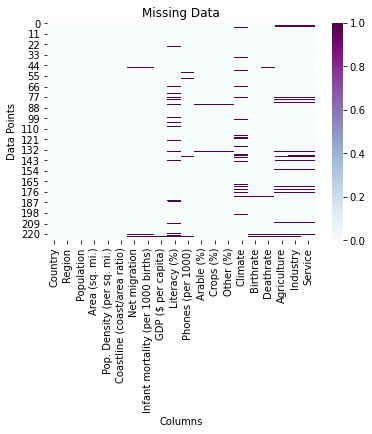

In [165]:
sns.heatmap(df.isnull(), cmap="BuPu").set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

I noticed that there are some missing data points in the table, but it is not extensive.
14/20 of our columns have missing data points, the maximum percentage of missing data is in the 'Climate' column, and it is less than 10% (22/227).


For simplicity, I will just fill the missing data using the mean of the region that a country belongs, as countries that are close geologically are often similar in many ways. For example, lets check the region median of 'GDP ($ per capita)', 'Literacy (%)', 'birthrate' and 'deathrate'. 

In [178]:
df.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Birthrate', 'Deathrate']].median()

,GDP ($ per capita),Literacy (%),Birthrate,Deathrate
Region,,,,
ASIA (EX. NEAR EAST),3450.0,90.60,19.565,6.960
BALTICS,11400.0,99.80,9.240,13.250
C.W. OF IND. STATES,3450.0,99.05,15.850,9.325
EASTERN EUROPE,9100.0,98.60,9.720,10.310
LATIN AMER. & CARIB,6300.0,94.05,18.020,6.090
NEAR EAST,9250.0,83.00,21.595,4.560
NORTHERN AFRICA,6000.0,70.00,21.980,5.130
NORTHERN AMERICA,29800.0,97.50,13.520,7.800
OCEANIA,5000.0,95.00,22.320,5.690


I will fill the missing data in the following way:
1. Net_migration: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
2. Infant_mortality: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
3. Gdp_per_capita: 1 missing value. West Sahara, from internet search, their gdp per capita is $2500, and we will put this value into our data set. 
4. Literacy %: 18 missing values, replaces by the mean literacy of each missing value's region.
5. Phones: 4 missing values, replaces by the mean phones of each missing value's region.
6. Arable, crops, and other: 2 missing values of very small islands, replace with zero.
7. Climate: 22 missing, replace with 0, where zero will represent a 'unknown' value. 
8. Birthrate, and deathrate: 3 missing, replace with their region's mean rates, since those rates are per 1000, and not population related. 
9. Agricultue, industry, and service: 15 missing values, all belong to very small island nations. After inspection for similar nations, I have found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So I will replace the missing values with the following: agricultue = 0.15, industry = 0.05. service = 0.8. 

In [157]:
df['net_migration'].fillna(0, inplace=True)
df['infant_mortality'].fillna(0, inplace=True)
df['gdp_per_capita'].fillna(2500, inplace=True)
df['literacy'].fillna(df.groupby('region')['literacy'].transform('mean'), inplace= True)
df['phones'].fillna(df.groupby('region')['phones'].transform('mean'), inplace= True)
df['arable'].fillna(0, inplace=True)
df['crops'].fillna(0, inplace=True)
df['other'].fillna(0, inplace=True)
df['climate'].fillna(0, inplace=True)
df['birthrate'].fillna(df.groupby('region')['birthrate'].transform('mean'), inplace= True)
df['deathrate'].fillna(df.groupby('region')['deathrate'].transform('mean'), inplace= True)
df['agriculture'].fillna(0.17, inplace=True)
df['service'].fillna(0.8, inplace=True)
df['industry'].fillna((1 - df['agriculture'] - df['service']), inplace= True)

Now, let's check our missing data: 

In [158]:
print(df.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


No missing data anymore.

Now, we will look at correlation of features. Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. When two sets of data are strongly linked together we say they have a High Correlation.

In [159]:
df.corr()

,population,area,density,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,birthrate,deathrate,agriculture,industry,service
population,1.000000,0.469985,-0.028190,0.000036,0.026077,-0.038510,-0.049303,-0.029876,0.189547,-0.059485,-0.099027,-0.044072,-0.025950,-0.001804,0.115935,-0.098023
area,0.469985,1.000000,-0.066917,0.047472,-0.003322,0.072686,0.029462,0.054151,-0.076156,-0.142036,0.138990,-0.064798,0.042402,-0.052532,0.136980,-0.073947
density,-0.028190,-0.066917,1.000000,0.178011,-0.140602,0.196251,0.097432,0.280596,-0.082344,-0.032516,0.066340,-0.157870,-0.067874,-0.105457,-0.175494,0.240267
net_migration,0.000036,0.047472,0.178011,1.000000,-0.024747,0.381599,-0.015725,0.239162,-0.067514,-0.345065,0.157139,-0.065035,0.033289,-0.104243,-0.050783,0.130501
infant_mortality,0.026077,-0.003322,-0.140602,-0.024747,1.000000,-0.587497,-0.748485,-0.661273,-0.104942,-0.073439,0.113437,0.841176,0.658214,0.686394,0.077973,-0.637142
gdp_per_capita,-0.038510,0.072686,0.196251,0.381599,-0.587497,1.000000,0.516169,0.830849,0.021341,-0.216853,0.077779,-0.642626,-0.194767,-0.568344,-0.064812,0.529802
literacy,-0.049303,0.029462,0.097432,-0.015725,-0.748485,0.516169,1.000000,0.590145,0.088564,0.031126,-0.071912,-0.781316,-0.372095,-0.580597,-0.019558,0.497957
phones,-0.029876,0.054151,0.280596,0.239162,-0.661273,0.830849,0.590145,1.000000,0.054791,-0.152004,-0.015306,-0.720892,-0.254374,-0.564654,-0.224497,0.665620
arable,0.189547,-0.076156,-0.082344,-0.067514,-0.104942,0.021341,0.088564,0.054791,1.000000,0.098852,-0.727291,-0.190917,0.059952,-0.034524,0.004078,0.027451
crops,-0.059485,-0.142036,-0.032516,-0.345065,-0.073439,-0.216853,0.031126,-0.152004,0.098852,1.000000,-0.513867,0.117215,-0.208721,0.052821,-0.095403,0.039219


Some insights from the above correlation table:
    
expected stronge correlation between infant_mortality and birthrate

expected stronge correlation between infant_mortality and literacy

expected stronge correlation between gdp_per_capita and phones

expected stronge correlation between birthrate and literacy (the less literacy the higher the birthrate)

unexpected stronge correlation between birthrate and phones

unexpected stronge correlation between infant_mortality and agriculture


# <a id='4'>4. Data analysis ana visualization</a>

### <a id='4-1'>4.1 Countries With Low Birthrate & Low GDP</a>

Let's look at the countries with low birthrate (<12%) and low GDP per capita (<10000 $). They also have hight literacy, like other high average GDP countires. But we hope their other features can help distiguish them from those with low birthrate but high average GDPs, like service are not quite an importent portion in their economy, not a lot phone procession, some have negative net migration. And many of them are from Eastern Europe or former Soviet Union countries, so the 'region' feature may also affect.

In [202]:
df.loc[(df['Birthrate']<12)&(df['GDP ($ per capita)']<10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575
211,Ukraine,C.W. OF IND. STATES,46710816,603700,77.4,0.46,-0.39,20.34,5400.0,99.7,259.9,56.21,1.61,42.18,3.0,8.82,14.39,0.187,0.452,0.361


# <a id='5'>5. Scraping and analysis of countries suicide rate</a>

Importing suicide statistics from World Health Organization (WHO) API

In [242]:
import requests
import json
import pandas as pd
r = requests.get('http://apps.who.int/gho/athena/api/GHO/MH_12/.json?filter=Year:2016')
data = r.json()

Converting JSON data to Python List

In [243]:
list_of_data = []
for fact in data['fact']:
    for category in fact['Dim']:
        if category['category'] == 'COUNTRY':
            country_code = category['code']
        elif category['category'] == "SEX":
            sex = category['code']
    suicide_rate = fact['value']['numeric']
    list_of_data.append({'Country Code': country_code, 'Sex': sex, "Suicide Rate": suicide_rate})

country_codes = []
for country in list_of_data:
    country_codes.append(country['Country Code'])

country_codes = set(country_codes)

data_dictionary = []
for country in country_codes:
    data_dictionary.append({'Country Code': country, 'Male Suicide Rate':'', 'Female Suicide Rate':'', 'Combined Suicide Rate':''})


Creating Python list with dictionary for each country

In [244]:
for data in list_of_data:
    for country in data_dictionary:
        if data['Country Code'] == country['Country Code']:
            if data['Sex'] == 'MLE':
                country['Male Suicide Rate'] = data['Suicide Rate']
            elif data['Sex'] == "FMLE":
                country['Female Suicide Rate'] = data['Suicide Rate']
            elif data['Sex'] == 'BTSX':
                country['Combined Suicide Rate'] = data['Suicide Rate']

Converting to Pandas DataFrame

In [245]:
suicide_rates = pd.DataFrame.from_dict(data_dictionary,)
suicide_rates.set_index(['Country Code'], inplace=True)
suicide_rates.sort_index(inplace=True)

In [246]:
suicide_rates.head()

,Male Suicide Rate,Female Suicide Rate,Combined Suicide Rate
Country Code,,,
AFG,10.6,2.1,6.4
AGO,14.0,4.6,8.9
ALB,7.0,4.3,5.6
ARE,3.5,0.8,2.7
ARG,15.0,3.5,9.1


Adding Country name Data and cleaning

In [247]:
r = requests.get('http://apps.who.int/gho/athena/api/GHO/MH_12/.json?filter=Year:2016')
data = r.json()
country_names = []
for country in data['dimension'][4]['code']:
    country_names.append({'Country Code': country['label'], 'Country Name': country['display']})

country_names_df = pd.DataFrame.from_dict(country_names)
country_names_df.set_index('Country Code', inplace=True)

country_names_df.loc[country_names_df.index == "MLT"]

# clean Up Country Names
country_names_df.loc[country_names_df['Country Name'] == "Democratic People's Republic of Korea"] = "North Korea"
country_names_df.loc[country_names_df['Country Name'] == "The former Yugoslav republic of Macedonia"] = "Macedonia"
country_names_df.loc[country_names_df['Country Name'] == "Republic of Moldova"] = "Moldova"
country_names_df.loc[country_names_df['Country Name'] == "Iran (Islamic Republic of)"] = "Iran"
country_names_df.loc[country_names_df['Country Name'] == "Russian Federation"] = "Russia"
country_names_df.loc[country_names_df['Country Name'] == "United Kingdom of Great Britain and Northern Ireland"] = "United Kingdom"
country_names_df.loc[country_names_df['Country Name'] == "Venezuela (Bolivarian Republic of)"] = "Venezuela"
country_names_df.loc[country_names_df['Country Name'] == "United States of America"] = "United States"

country_names_df.tail(15)

suicide_rates = suicide_rates.join(country_names_df)
# suicide_rates

In [248]:
suicide_rates = suicide_rates[['Country Name', 'Combined Suicide Rate', 'Male Suicide Rate', 'Female Suicide Rate']]
suicide_rates.head()

,Country Name,Combined Suicide Rate,Male Suicide Rate,Female Suicide Rate
Country Code,,,,
AFG,Afghanistan,6.4,10.6,2.1
AGO,Angola,8.9,14.0,4.6
ALB,Albania,5.6,7.0,4.3
ARE,United Arab Emirates,2.7,3.5,0.8
ARG,Argentina,9.1,15.0,3.5


In [249]:
suicide_rates.shape

(183, 4)

In [259]:
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, AFG to ZWE
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country Name           183 non-null    object 
 1   Combined Suicide Rate  183 non-null    float64
 2   Male Suicide Rate      183 non-null    float64
 3   Female Suicide Rate    183 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.1+ KB


Using scraping I got a new dataset with 183 rows, without any missing values.

According to the results of scraping, we see that the number of countries is 183. In the previous data set, the number of countries is 227. Due to the big difference, I cannot connect the two datasets together. Therefore, I will analyze two datasets separately.  But I hope that I can come to some general conclusion.